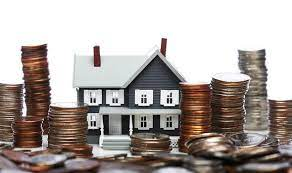

<h1 style=background-color:Tomato;><center> Introductin</center></h1>

**We know that house prices always change from one house to another, and there are many reasons that control the prices of houses, such as:**
* home space
* home location
* The shape of the house and how it was built
* The number of rooms the house contains

🟢 Goal: This notebook has the purpose of analysing and predicting house price

### 📚 Libraries & Functions

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

##### Load dataset

In [ ]:
df=pd.read_csv('../input/housecsv/houses.csv')

In [ ]:
df.head()

In [ ]:
df.shape

In [ ]:
df.isna().sum()

#### Here we make function use to remove the missing values

In [ ]:
def data_clean(df):
    df.fillna(0,inplace=True)
    print(df.isnull().sum())

In [ ]:
data_clean(df)

* now we see the all data is very clean

In [ ]:
list=['price','condition','grade']

for i in list:
    print('{} has unique values as {}'.format(i,df[i].unique()))

In [ ]:
len(df[df['price']==0])

In [ ]:
pd.set_option('display.max_columns',32)

In [ ]:
filter=(df['condition']==0) & (df['price']==0) & (df['grade']==0)
df[filter]

In [ ]:
data=df[~filter]

In [ ]:
data.head()

In [ ]:
data.describe()

#### Lets perform Spatial Analysis

In [ ]:
df['lat'].reset_index()

In [ ]:
df['price'].reset_index()

#### Let's Compere The every columns to price to see how each columns effict the price

In [ ]:
house_bathroom=df.groupby(['bathrooms'])['price'].mean().reset_index()
house_bathroom

In [ ]:
house_bathroom=df.groupby(['bathrooms'])['price'].mean().plot(kind='bar')

In [ ]:
house_bedrooms=df.groupby(['bedrooms'])['price'].mean().reset_index()
house_bedrooms

In [ ]:
house_bedrooms=df.groupby(['bedrooms'])['price'].mean().plot(kind='bar')

In [ ]:
house_sqft_living=df.groupby(['sqft_living'])['price'].mean().reset_index()
house_sqft_living

In [ ]:
house_sqft_living=df.groupby(['sqft_living'])['price'].mean().plot()

In [ ]:
house_sqft_lot=df.groupby(['sqft_lot'])['price'].mean().reset_index()
house_sqft_lot

In [ ]:
house_sqft_lot=df.groupby(['sqft_lot'])['price'].mean().plot()

In [ ]:
px.line(df, x='price', y=['sqft_living','sqft_lot'],
        title='House price per sqft_living and sqft_lot')

In [ ]:
house_waterfront=df['waterfront'].value_counts().reset_index()
house_waterfront.columns=['price','waterfront']
house_waterfront

In [ ]:
px.line(df, x='price', y=['waterfront','sqft_lot'],
        title='House price per waterfront and sqft_lot')

### Select important Features using Co-relation

In [ ]:
df1=df.corr()
df1

In [ ]:
co_relation=data.corr()["price"]
co_relation

In [ ]:
co_relation.abs().sort_values(ascending=False)

In [ ]:
co_relation.abs().sort_values(ascending=False)[1:]

In [ ]:
import warnings
from warnings import filterwarnings
filterwarnings("ignore")

## Feature Encoding

### Perform Mean Encoding Technique 

In [ ]:
cols=df.columns[0:8]
cols

In [ ]:
for col in cols:
    print(df.groupby([col])['view'].mean())
    print('\n')

In [ ]:
for col in cols:
    print(df.groupby([col])['condition'].mean().to_dict())
    print('\n')
    

In [ ]:
df3=data.copy()

In [ ]:
for col in cols:
    dict=data.groupby([col])['price'].mean().to_dict()
    data[col]=data[col].map(dict)

In [ ]:
df3.head()

In [ ]:
sns.distplot(data['price'])

In [ ]:
def handle_outlier(col):
    data[col]=np.log1p(data[col])

In [ ]:
handle_outlier('price')


In [ ]:
sns.distplot(data['price'].dropna())

In [ ]:
sns.distplot(data['view'])

In [ ]:
## separate dependent & independent features
y=data['price']
x=data.drop('price',axis=1)

### Feature Importance

In [ ]:
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel

##### select a suitable alpha (equivalent of penalty).
##### The bigger the alpha the less features that will be selected.

In [ ]:
feature_sel_model = SelectFromModel(Lasso(alpha=0.005, random_state=0)) # remember to set the seed, the random state in this function
feature_sel_model.fit(x,y)

In [ ]:
feature_sel_model.get_support()

In [ ]:
cols=x.columns
# let's print the number of total and selected features
# this is how we can make a list of the selected features
selected_feat = cols[(feature_sel_model.get_support())]

In [ ]:
# let's print some stats
print('total features: {}'.format((x.shape[1])))
print('selected features: {}'.format(len(selected_feat)))

In [ ]:
selected_feat

In [ ]:
x=x[selected_feat]